In [3]:
# %pip install pandas
# %pip install matplotlib
# %pip install scipy
# %pip install seaborn
# %pip install numpy

In [4]:
import pandas
import matplotlib.pyplot
import seaborn
import numpy

In [9]:
survey = pandas.read_csv( '../data/Chatbots Impact on University Learning/chatbots_cleaned.csv' )
survey.head()

,Timestamp,Q1,Q2,Q3,Q4,Q5.1,Q5.2,Q5.3,Q5.4,Q5.5,...,Q8.2,Q8.3,Q8.4,Q8.5,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,5.14.2023 21:22:19,Master,International Economic Relations,Female,Îften,Agree,Agree,Strongly Agree,Strongly Agree,Agree,...,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,NaN
1,5.15.2023 8:45:52,Bachelor,International Economic Relations,Female,Sometimes,Disagree,Agree,Disagree,Strongly Disagree,Neutral,...,Agree,Agree,Disagree,Neutral,Neutral,Agree,Neutral,Disagree,Disagree,NaN
2,5.15.2023 9:54:15,Bachelor,International Economic Relations,Female,Rarely,Neutral,Neutral,Neutral,Disagree,Neutral,...,Agree,Agree,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,NaN
3,5.15.2023 15:17:41,Bachelor,International Economic Relations,Female,Rarely,Agree,Agree,Agree,Disagree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,NaN
4,5.15.2023 15:19:02,Bachelor,International Economic Relations,Female,Sometimes,Agree,Agree,Neutral,Disagree,Agree,...,Agree,Agree,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,NaN


In [7]:
def generate_distplot_numeric( data, unique_values, title = "" ):
    plot = seaborn.displot( data, bins = unique_values, kde = True )

    bin_edges = numpy.linspace( data.min(), data.max(), unique_values + 1 )
    tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    for ax in plot.axes.flat:
        ax.set_xticks( tick_positions )
        ax.set_xticklabels( range( 1, unique_values + 1 ) )
        ax.set_xlim( bin_edges[0], bin_edges[-1] )

    matplotlib.pyplot.title( title )

    print( data.describe() )

    matplotlib.pyplot.show()

def generate_distplot_text( data, labels, unique_values, title = "" ):
    plot = seaborn.displot( data, bins = unique_values, kde = True )

    bin_edges = numpy.linspace( data.min(), data.max(), unique_values + 1 )
    tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    for ax in plot.axes.flat:
        ax.set_xticks( tick_positions )
        ax.set_xticklabels( labels )
        ax.set_xlim( bin_edges[0], bin_edges[-1] )

    matplotlib.pyplot.title( title )

    matplotlib.pyplot.xticks( rotation = 45, ha = 'right' )

    print( data.describe() )

    matplotlib.pyplot.show()

def generate_barplot( data, title = "" ):
    split_responses = [ response.split(';') for response in data ]
    counter = {}
    for response in split_responses:
        for choice in response:
            if choice in counter:
                counter[ choice ] += 1
            else:
                counter[ choice ] = 1

    seaborn.barplot(
        pandas.DataFrame( list( counter.items() ), columns = ['Choice', 'Count'] ),
        y = 'Choice',
        x = 'Count'
    )

    matplotlib.pyplot.title( title )

    matplotlib.pyplot.show()

**Question 1:** What is your academic level?

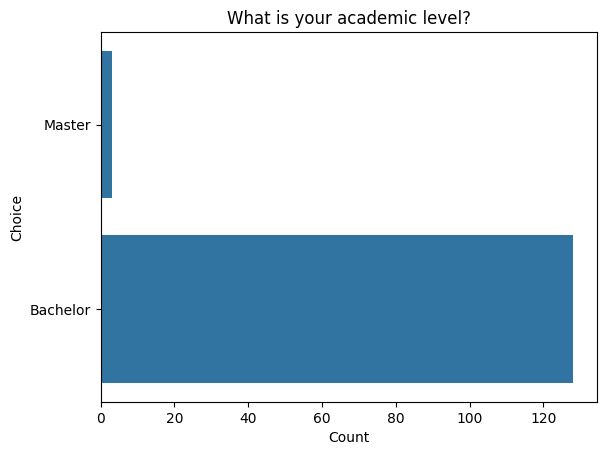

In [10]:
generate_barplot( survey['Q1'], "What is your academic level?" )